In [1]:
import pandas as pd
import numpy as np
from string import ascii_letters
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
data = pd.read_csv('energy_and_water_consumption_data.csv')
data.shape

(11746, 60)

In [3]:
pd.set_option('display.max_columns', 60)
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

In [95]:
# data['3rd Largest Property Use Type - Gross Floor Area (ft²)'].unique()

In [6]:
data = data.replace({'Not Available': np.nan})

# проход по по колонкам и замена численных значений из типа object в тип float
for col in list(data.columns):
        if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
            data[col] = data[col].astype('float')

In [96]:
# data.info()

In [8]:
# https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe/39734251#39734251

def missing_values_table(data):
    mis_val_sum = data.isnull().sum()
    mis_val_percent = 100 * mis_val_sum/len(data)
    mis_val_table = pd.concat([mis_val_sum, mis_val_percent], axis = 1)
    mis_val_table.columns = ['Missing_values', '% of total values']
    mis_val_table = mis_val_table.sort_values(by=['% of total values'], ascending = False).round(2)
    print(f'Number of columns in dataframe {data.shape[1]}')
#     print(f'Number of columns with missing values {mis_val_table.shape[0]}')
      
    return mis_val_table

In [9]:
missing_values_table(data)

Number of columns in dataframe 60


,Missing_values,% of total values
Fuel Oil #1 Use (kBtu),11737,99.92
Diesel #2 Use (kBtu),11730,99.86
Address 2,11539,98.24
Fuel Oil #5 & 6 Use (kBtu),11152,94.94
District Steam Use (kBtu),10810,92.03
Fuel Oil #4 Use (kBtu),10425,88.75
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.37
3rd Largest Property Use Type,10262,87.37
Fuel Oil #2 Use (kBtu),9165,78.03
2nd Largest Property Use - Gross Floor Area (ft²),8005,68.15


In [10]:
# Исключим колонки с более чем 40% пропущенных значений
missing_df = missing_values_table(data)
missing_columns = list(missing_df[missing_df['% of total values'] > 60].index)
print('We will remove %d columns.' % len(missing_columns))

data = data.drop(columns = list(missing_columns))

Number of columns in dataframe 60
We will remove 11 columns.


# Разведочный анализ данных

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


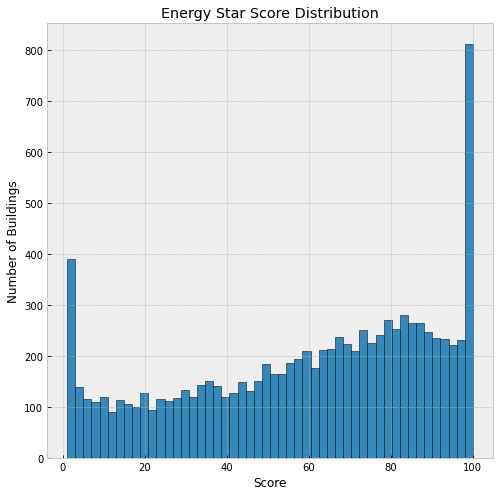

In [12]:
from matplotlib.pyplot import figure

figure(figsize=(8, 8))

print(plt.style.available)
plt.style.use('bmh')
data = data.rename(columns= {'ENERGY STAR Score': 'score'})

plt.hist(x = data.score.dropna(), bins = 50, edgecolor = 'k')
plt.xlabel('Score') 
plt.ylabel('Number of Buildings') 
plt.title('Energy Star Score Distribution')
plt.show()

Наблюдается значительная диспропорция по распределению значений оценки зданий, т.к. преобладает оценка 1 и 100. Если вернуться к определению оценки, то можно увидеть, что она связана на собственном отчёте о потреляемой энергии (1-to-100 percentile ranking for specified building types, calculated in Portfolio Manager, based on self-reported
energy usage for the reporting year.)

Это создает проблему, потому что у владельца здания может возникнуть соблазн сообщить о более низком потреблении электроэнергии, чтобы искусственно повысить оценку своего здания.

Text(0.5, 1.0, 'Site EUI Distribution')

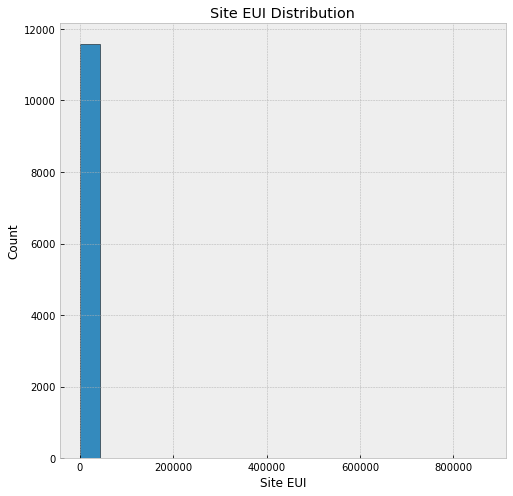

In [13]:
figure(figsize = (8,8))
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI') 
plt.ylabel('Count')
plt.title('Site EUI Distribution')

Из-за наличия выбросов график сильно смещён влево,так как присутствуют здания с большими значениями оценки интенсивности использования энергии. 

In [14]:
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

3173     51328.8
3170     51831.2
3383     78360.1
8269     84969.6
3263     95560.2
8268    103562.7
8174    112173.6
3898    126307.4
7       143974.4
8068    869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

In [15]:
data.loc[data['Site EUI (kBtu/ft²)'] == 869265, :]

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
8068,9984,4414323,234 Skillman,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3028937502,3028937502,"3390250 , 3338313",234 Skillman avenue,11211,234,SKILLMAN AVENUE,Brooklyn,61811.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,56900.0,2004,1,90,Whole Building,NaN,1.0,869265.0,939329.0,9.9,9393.0,986366.0,4.945919e+10,534458968.8,1983655.6,563239.6,2627199.1,2627015.0,184.1,56900.0,2547.9,44.78,912801.1,05/01/2017 11:34:14 PM,NaN,In Compliance,40.716233,-73.94141,1.0,34.0,477.0,East Williamsburg ...


# Обнаружение и удаление выбросов по правилу 1.5xIQR rule

In [16]:
# https://people.richland.edu/james/lecture/m170/ch03-pos.html

first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) &
            (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]

Text(0.5, 1.0, 'Site EUI Distribution')

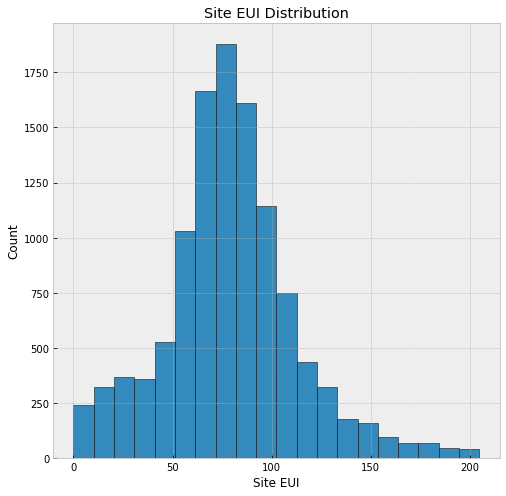

In [17]:
figure(figsize = (8,8))
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI') 
plt.ylabel('Count')
plt.title('Site EUI Distribution')

Теперь гистограмма близка к нормальному распределнию с небольшим искажением справа

# Выявление корреляции между признаками и таргетным значением

In [18]:
corr_data = data.corr()['score'].sort_values()

display(corr_data.head(10))
print()
display(corr_data.tail(10))

Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Direct GHG Emissions (Metric Tons CO2e)                      -0.147792
Weather Normalized Site Natural Gas Use (therms)             -0.135211
Natural Gas Use (kBtu)                                       -0.133648
Year Built                                                   -0.121249
Name: score, dtype: float64

Water Use (All Water Sources) (kgal)                 -0.013681
Water Intensity (All Water Sources) (gal/ft²)        -0.012148
Census Tract                                         -0.002299
DOF Gross Floor Area                                  0.013001
Property GFA - Self-Reported (ft²)                    0.017360
Largest Property Use Type - Gross Floor Area (ft²)    0.018330
Order                                                 0.036827
Community Board                                       0.056612
Council District                                      0.061639
score                                                 1.000000
Name: score, dtype: float64

Между функциями и целью существует несколько сильных отрицательных корреляций. Наиболее отрицательными корреляционными связями с таргетным значением являются различные категории интенсивности использования энергии. 

EUI - это количество энергии, потребляемой зданием, деленное на квадратные метры зданий, и предназначено для измерения эффективности здания, где чем ниже балл, тем лучше. Интуитивно эти корреляции имеют смысл: по мере увеличения EUI рейтинг Energy Star Score имеет тенденцию к снижению.

Чтобы учесть возможные нелинейные отношения, мы можем извлечь квадратный корень и преобразовать свойства в натуральный логарифм, а затем вычислить коэффициенты корреляции с оценкой.

In [19]:
numeric = data.select_dtypes('number')

for col in numeric.columns:
    if col == 'score':
        next
        
    else:
        numeric['sqrt_' + col] = np.sqrt(numeric[col])
        numeric['log_' + col] = np.log(numeric[col])

categorical = data[['Borough', 'Largest Property Use Type']]

categorical = pd.get_dummies(categorical)

corr_features = pd.concat([numeric, categorical])

corr_features = corr_features.dropna(subset = ['score'])


<ipython-input-19-4469d6650ee6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric['sqrt_' + col] = np.sqrt(numeric[col])
<ipython-input-19-4469d6650ee6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric['log_' + col] = np.log(numeric[col])
/home/sergey/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/sergey/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.p

In [20]:
correlations = corr_features.corr()['score'].dropna().sort_values()

print(correlations.tail(10))
print()

print(correlations.head(10))

log_Largest Property Use Type - Gross Floor Area (ft²)    0.027315
sqrt_Order                                                0.028662
Order                                                     0.036827
log_Community Board                                       0.055495
Community Board                                           0.056612
sqrt_Community Board                                      0.058029
sqrt_Council District                                     0.060623
log_Council District                                      0.061101
Council District                                          0.061639
score                                                     1.000000
Name: score, dtype: float64

Site EUI (kBtu/ft²)                             -0.723864
Weather Normalized Site EUI (kBtu/ft²)          -0.713993
sqrt_Site EUI (kBtu/ft²)                        -0.699817
sqrt_Weather Normalized Site EUI (kBtu/ft²)     -0.689019
sqrt_Weather Normalized Source EUI (kBtu/ft²)   -0.671044
sqrt_Source

Выполнение логарифмической трансформации функций не приводит к значительному увеличению линейных корреляций между функциями и оценкой.

# Построим график корреляционных пар между несколькими переменными и таргетным значением

In [21]:
plot_data = corr_features[['score', 'Site EUI (kBtu/ft²)', 
                      'Weather Normalized Source EUI (kBtu/ft²)', 
                      'sqrt_Site EUI (kBtu/ft²)',
                        'Source EUI (kBtu/ft²)']]

plot_data = plot_data.replace({np.inf: np.nan, - np.inf: np.nan})

plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'Site EUI', 
                                        'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
                                        'sqrt_Site EUI (kBtu/ft²)': 'sqrt_Site EUI',
                                        'Source EUI (kBtu/ft²)': 'Source EUI'})
plot_data = plot_data.dropna()

def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

Используя функцию seaborn PairGrid, мы можем сопоставить различные графики. В верхнем треугольнике будут диаграммы рассеяния, на диагональной прямой - гистограммы, а в нижнем треугольнике - коэффициент корреляции между двумя переменными.

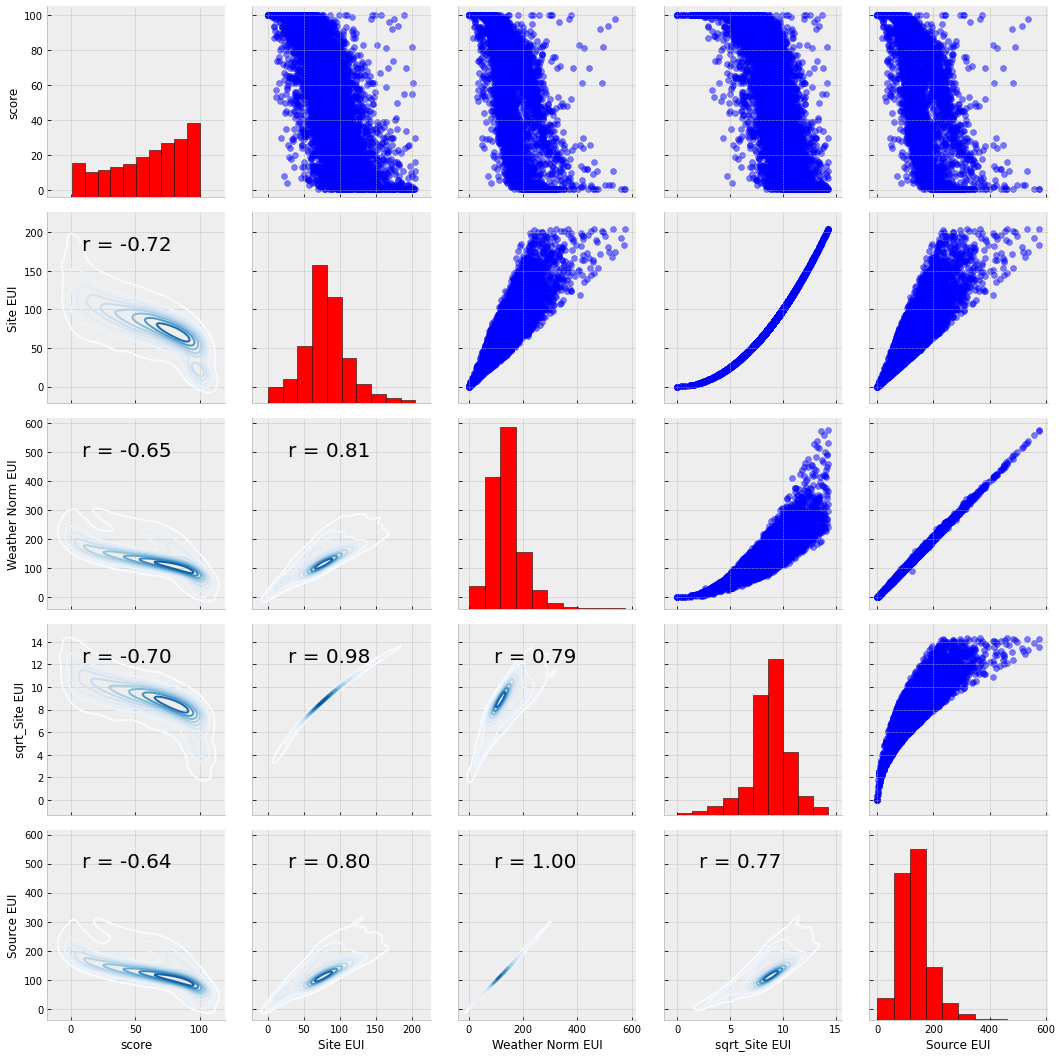

In [22]:
grid = sns.PairGrid(data = plot_data, height = 3)
grid.map_upper(plt.scatter, color = 'blue', alpha = 0.5)
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Blues)

# Конструирование и выбор признаков

In [23]:
features = data.copy()


numeric_subset = data.select_dtypes('number')

for col in numeric_subset.columns:
    if col != 'score':
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
    else:
        next
        
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape

<ipython-input-23-1b662f4f60aa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_subset['log_' + col] = np.log(numeric_subset[col])
/home/sergey/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/sergey/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(11319, 110)

# Удаление коллинеарных признаков

Построение карты коллинеарных признаков

<AxesSubplot:>

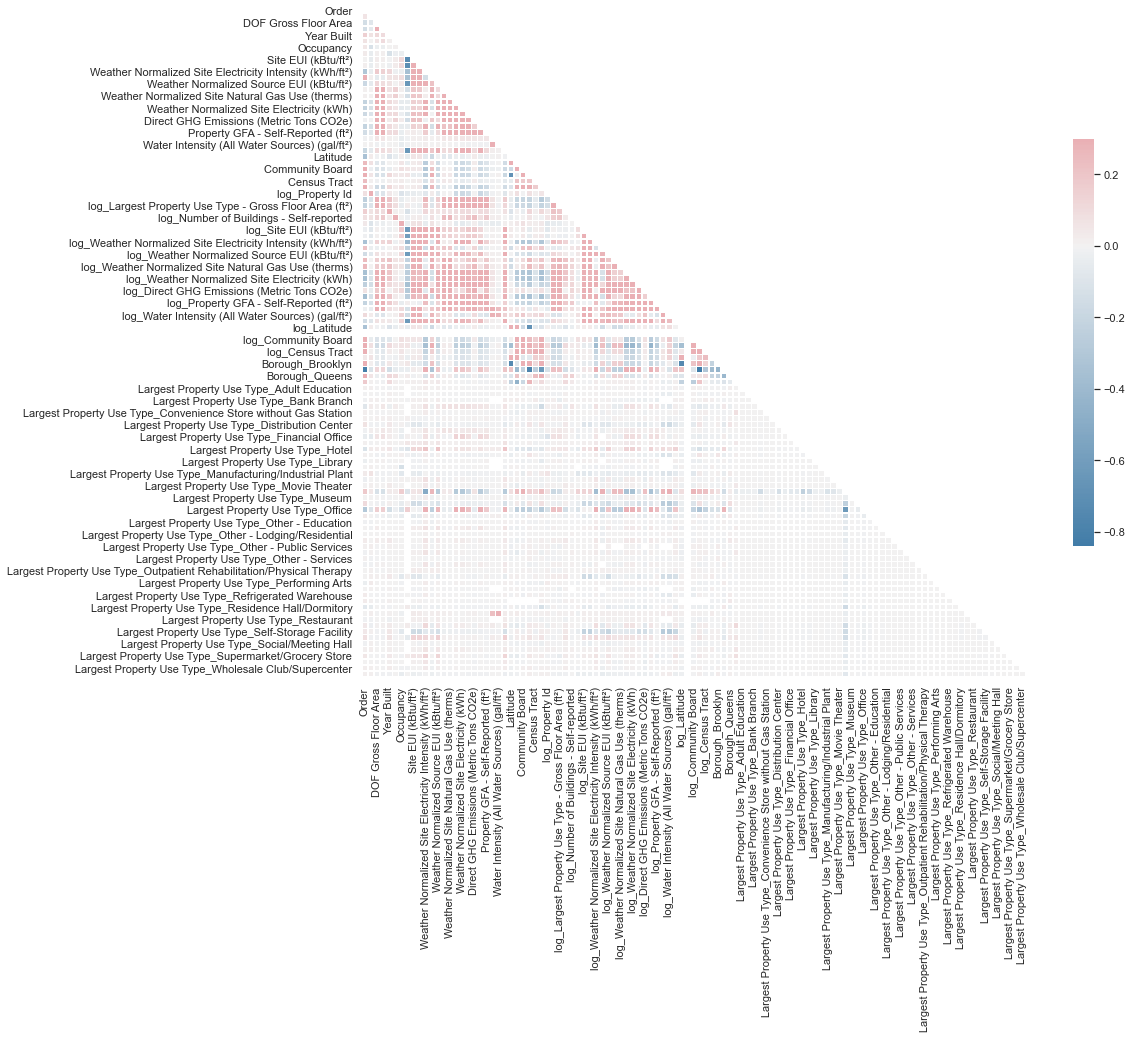

In [24]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html

sns.set_theme(style = 'white')
corr = features.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize = (15, 15))
cmap = sns.diverging_palette(240, 10, n = 9, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Как пример, в данных оценка зданий(Site EUI) и оценка погодных условий(Weather Norm EUI) сильно коррелируют между собой.

Переменные, сильно коррелирующие между собой, могут быть избыточными в том смысле, что нам нужно сохранить только одну из функций, чтобы предоставить нашей модели необходимую информацию.

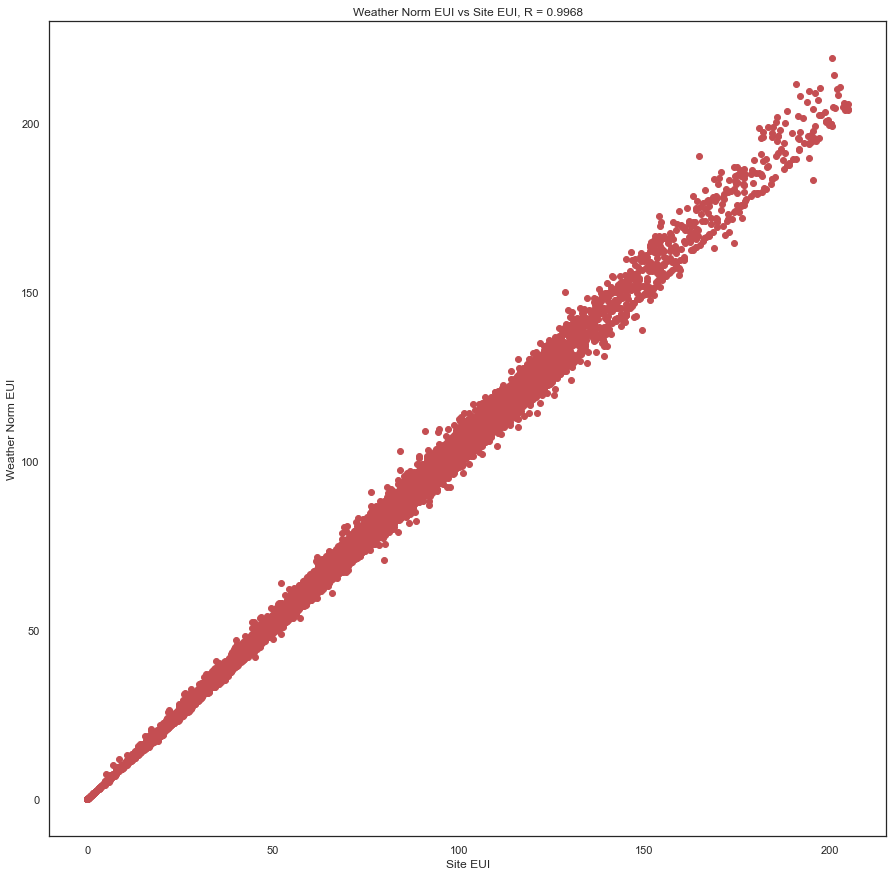

In [25]:
f, ax = plt.subplots(figsize = (15, 15))
plot_data = data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna()

plt.plot(plot_data['Site EUI (kBtu/ft²)'], plot_data['Weather Normalized Site EUI (kBtu/ft²)'], 'ro')
plt.xlabel('Site EUI'); plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' 
          % np.corrcoef(data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)[0][1]);

Удаление сильно коррелирующих между собой принаков

In [26]:
# https://stackoverflow.com/a/51658973

def corr_df(x, corr_val):
    '''
    Obj: Drops features that are strongly correlated to other features.
          This lowers model complexity, and aids in generalizing the model.
    Inputs:
          df: features df (x)
          corr_val: Columns are dropped relative to the corr_val input (e.g. 0.8)
    Output: df that only includes uncorrelated features
    '''

    # Creates Correlation Matrix and Instantiates
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterates through Correlation Matrix Table to find correlated columns
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = item.values
            if abs(val) >= corr_val:
                # Prints the correlated feature set and the corr val
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(i)

    drops = sorted(set(drop_cols))[::-1]

    # Drops the correlated columns
    for i in drops:
        col = x.iloc[:, (i+1):(i+2)].columns.values
        x = x.drop(col, axis=1)
    return x

In [27]:
features = corr_df(x = features, corr_val=0.6)

Weather Normalized Site EUI (kBtu/ft²) | score | -0.71
Weather Normalized Source EUI (kBtu/ft²) | score | -0.65
Weather Normalized Source EUI (kBtu/ft²) | Site EUI (kBtu/ft²) | 0.83
Weather Normalized Source EUI (kBtu/ft²) | Weather Normalized Site EUI (kBtu/ft²) | 0.81
Weather Normalized Source EUI (kBtu/ft²) | Weather Normalized Site Electricity Intensity (kWh/ft²) | 0.85
Natural Gas Use (kBtu) | Largest Property Use Type - Gross Floor Area (ft²) | 0.61
Weather Normalized Site Natural Gas Use (therms) | Largest Property Use Type - Gross Floor Area (ft²) | 0.61
Electricity Use - Grid Purchase (kBtu) | DOF Gross Floor Area | 0.63
Electricity Use - Grid Purchase (kBtu) | Largest Property Use Type - Gross Floor Area (ft²) | 0.67
Weather Normalized Site Electricity (kWh) | DOF Gross Floor Area | 0.66
Weather Normalized Site Electricity (kWh) | Largest Property Use Type - Gross Floor Area (ft²) | 0.66
Total GHG Emissions (Metric Tons CO2e) | DOF Gross Floor Area | 0.75
Total GHG Emissions 

Largest Property Use Type_Office | Largest Property Use Type_Multifamily Housing | -0.63


In [28]:
features  = features.dropna(axis=1, how = 'all')
features.shape

(11319, 68)

# Разделение данных на тренировочные и тестовые

In [29]:
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]

print(no_score.shape)
print(score.shape)

(1858, 68)
(9461, 68)


In [30]:
from sklearn.model_selection import train_test_split
features = score.drop(columns='score')
targets = pd.DataFrame(score['score'])

features = features.replace({np.inf:np.nan, 
                             -np.inf:np.nan})

train_features, test_features, train_labels, test_labels = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)

Training Feature Size:  (6622, 67)
Testing Feature Size:   (2839, 67)
Training Labels Size:   (6622, 1)
Testing Labels Size:    (2839, 1)


In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Подготовка модели к обучению

In [32]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', MinMaxScaler(feature_range=(0,1)))
])

X = num_pipeline.fit_transform(train_features)
X_test = num_pipeline.fit_transform(test_features)

In [33]:
print('Missing values in training features: ', np.sum(np.isnan(X)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))

Missing values in training features:  0
Missing values in testing features:   0


In [34]:
# Convert y to one-dimensional array (vector)
y = np.array(train_labels).reshape((-1, ))
y_test = np.array(test_labels).reshape((-1, ))

In [35]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

def fit_and_evaluate(model):
    model.fit(X,y)
    model_pred = model.predict(X_test)
    
    model_mae = mae(y_test, model_pred)
    
    return model_mae


In [36]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)
print(f'Linear Regression MAE {lr_mae:.4f}')

svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)
print(f'Support Vector Machine Regression MAE {svm_mae:.4f}')

random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)
print(f'Random Forest Regression MAE {random_forest_mae:.4f}')

gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)
print(f'Gradient Boosted Regression MAE {gradient_boosted_mae:.4f}')


knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)
print(f'K-Nearest Neighbors Regression MAE {knn_mae:.4f}')

Linear Regression MAE 13.7216
Support Vector Machine Regression MAE 11.0636
Random Forest Regression MAE 9.9052
Gradient Boosted Regression MAE 10.6786
K-Nearest Neighbors Regression MAE 13.6416


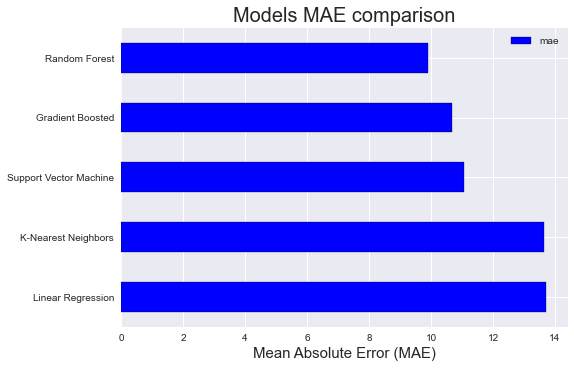

In [37]:
# plt.style.available
plt.style.use('seaborn')

model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae, svm_mae, random_forest_mae, 
                                         gradient_boosted_mae, knn_mae]})



# model_comparison.sort_values('mae', ascending=False).plot.bar()

model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'blue', edgecolor = 'black')

plt.xlabel('Mean Absolute Error (MAE)', size = 15)
plt.ylabel('')
plt.title('Models MAE comparison', size = 20)
plt.show()

Из гистограммы можно сделать вывод, что что алгоритм решающих деревьев выдал наименьшую абсолютную среднюю ошибку. Займёмся подбором гиперпараметров к этому алготму для улучшения производительности нашей модели.

# Подбор гиперпараметров, используя рандомный поиск и кросс-валидацию

In [38]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_depth = [int(x) for x in np.linspace(start = 10, stop = 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
max_features = ['auto', 'sqrt', 'log2']

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

10*12*3*3*2*3 # number of settings


6480

In [39]:
rf = RandomForestRegressor(random_state=60)

rf_random = RandomizedSearchCV(estimator=rf, 
                               param_distributions=random_grid, 
                               n_iter = 50, cv = 3, verbose=2, 
                               random_state=60, n_jobs=-1)

rf_random.fit(X, y)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/home/sergey/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=60),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=60, verbose=2)

In [40]:
gyper_results = pd.DataFrame(rf_random.cv_results_).sort_values('mean_test_score', ascending=False)

gyper_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
30,27.960348,0.064693,0.261443,0.000923,800,5,2,auto,40,True,"{'n_estimators': 800, 'min_samples_split': 5, ...",0.802720,0.810586,0.781268,0.798191,0.012390,1
12,28.012988,0.087840,0.247893,0.001615,1000,5,2,auto,10,True,"{'n_estimators': 1000, 'min_samples_split': 5,...",0.800812,0.809637,0.780757,0.797069,0.012084,2
41,43.030973,0.276277,0.402640,0.000425,1400,2,4,auto,20,True,"{'n_estimators': 1400, 'min_samples_split': 2,...",0.797654,0.804536,0.775576,0.792589,0.012353,3
3,56.050945,0.460663,0.550329,0.044482,1800,2,4,auto,60,True,"{'n_estimators': 1800, 'min_samples_split': 2,...",0.797685,0.804543,0.775336,0.792522,0.012470,4
7,14.965018,0.080001,0.561464,0.001837,1200,2,1,sqrt,None,False,"{'n_estimators': 1200, 'min_samples_split': 2,...",0.754826,0.760581,0.736570,0.750659,0.010236,5
13,17.618286,0.250058,0.627798,0.005332,1600,5,1,sqrt,80,False,"{'n_estimators': 1600, 'min_samples_split': 5,...",0.753191,0.759485,0.734377,0.749018,0.010666,6
11,6.615960,0.097847,0.237632,0.004588,600,5,1,sqrt,None,False,"{'n_estimators': 600, 'min_samples_split': 5, ...",0.752471,0.758231,0.735361,0.748688,0.009712,7
32,11.969556,0.095047,0.420445,0.000708,1200,10,1,sqrt,110,False,"{'n_estimators': 1200, 'min_samples_split': 10...",0.747577,0.754839,0.730086,0.744167,0.010389,8
5,18.469606,0.458786,0.633157,0.006320,1800,10,1,sqrt,40,False,"{'n_estimators': 1800, 'min_samples_split': 10...",0.747305,0.754488,0.729991,0.743928,0.010282,9
0,6.645616,0.009035,0.349748,0.001025,800,2,1,sqrt,90,True,"{'n_estimators': 800, 'min_samples_split': 2, ...",0.741847,0.748222,0.724503,0.738191,0.010022,10


In [41]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': True}

In [42]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [30,40,50],
    'max_features': ['auto'],
    'min_samples_leaf':[2, 3, 4],
    'min_samples_split': [4, 5, 8],
    'n_estimators': [500,700,800,1500]
    }


grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X,y)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=60), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [30, 40, 50],
                         'max_features': ['auto'],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [4, 5, 8],
                         'n_estimators': [500, 700, 800, 1500]},
             verbose=2)

In [43]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 800}

In [44]:
gyper_results = pd.DataFrame(grid_search.cv_results_).sort_values('mean_test_score', ascending=False)

gyper_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
10,26.637389,0.080695,0.242285,0.002464,True,30,auto,2,8,800,"{'bootstrap': True, 'max_depth': 30, 'max_feat...",0.802799,0.810941,0.781135,0.798292,0.012579,1
82,26.918086,0.226618,0.244111,0.000920,True,50,auto,2,8,800,"{'bootstrap': True, 'max_depth': 50, 'max_feat...",0.802800,0.810935,0.781135,0.798290,0.012577,2
46,26.904109,0.257192,0.246770,0.006357,True,40,auto,2,8,800,"{'bootstrap': True, 'max_depth': 40, 'max_feat...",0.802800,0.810935,0.781135,0.798290,0.012577,2
8,16.629167,0.006286,0.150993,0.000256,True,30,auto,2,8,500,"{'bootstrap': True, 'max_depth': 30, 'max_feat...",0.802966,0.810982,0.780713,0.798220,0.012805,4
44,16.693304,0.064391,0.151012,0.000327,True,40,auto,2,8,500,"{'bootstrap': True, 'max_depth': 40, 'max_feat...",0.802966,0.810972,0.780713,0.798217,0.012802,5


# Оценка финальной модели на тестовых данных

In [46]:
default_model = RandomForestRegressor(random_state = 60)
default_model.fit(X, y)
default_pred = default_model.predict(X_test)

In [47]:
final_model = grid_search.best_estimator_
final_model.fit(X, y)
final_pred = final_model.predict(X_test)

In [48]:
print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_pred))

Default model performance on the test set: MAE = 9.9052.
Final model performance on the test set:   MAE = 9.7596.


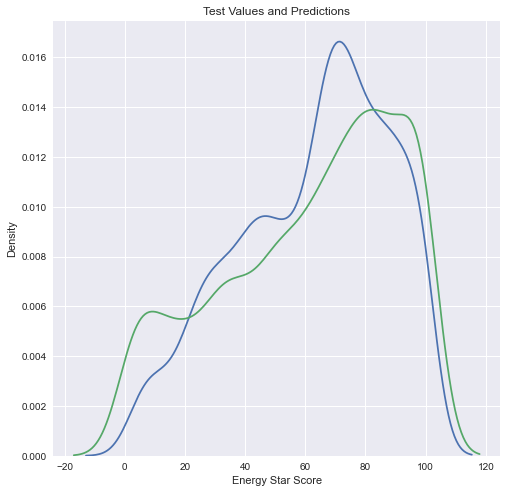

In [56]:
figure(figsize = (8,8))
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('Energy Star Score'); plt.ylabel('Density');
plt.title('Test Values and Predictions');

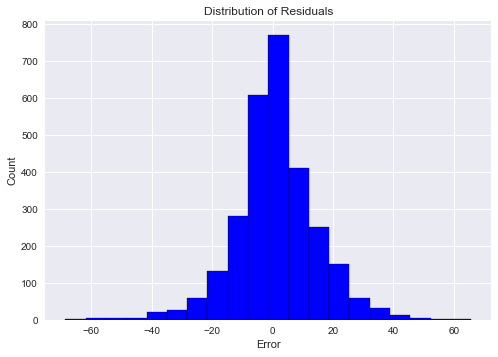

In [69]:
residuals = final_pred - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'blue', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

Результаты показали, что окончательная модель способна предсказать оценку Energy Star Score здания c абсолютной средней ошибкой 9.7. Также настройка гиперпараматров алгоритма RandomForestRegressor смогла улучшить производительность модели.

# Оценка важности признаков

In [82]:
feature_importances = grid_search.best_estimator_.feature_importances_

sorted(zip(feature_importances, list(train_features.columns)), reverse=True)

[(0.6195404183210564, 'Site EUI (kBtu/ft²)'),
 (0.14935960917346625,
  'Weather Normalized Site Electricity Intensity (kWh/ft²)'),
 (0.06649496848528932, 'Largest Property Use Type_Multifamily Housing'),
 (0.01753346677474062, 'Property Id'),
 (0.013862293385572136, 'Year Built'),
 (0.012793794728302603, 'Order'),
 (0.011818632591735925,
  'Largest Property Use Type_Non-Refrigerated Warehouse'),
 (0.011378092233512046, 'Largest Property Use Type - Gross Floor Area (ft²)'),
 (0.011313358716118294, 'log_Direct GHG Emissions (Metric Tons CO2e)'),
 (0.010967540165834963, 'DOF Gross Floor Area'),
 (0.009612128796681435, 'Census Tract'),
 (0.008463059900774941, 'Latitude'),
 (0.008312811284946299, 'Longitude'),
 (0.005966395924829532, 'Largest Property Use Type_Distribution Center'),
 (0.005538564600814434, 'Water Intensity (All Water Sources) (gal/ft²)'),
 (0.005530376401824996, 'log_Water Intensity (All Water Sources) (gal/ft²)'),
 (0.004925442672106295, 'log_Water Use (All Water Sources) 

In [83]:
feature_results = pd.DataFrame({'feature': list(train_features.columns),
                              'importance': feature_importances})

feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(10)

,feature,importance
0,Site EUI (kBtu/ft²),0.619540
1,Weather Normalized Site Electricity Intensity ...,0.149360
2,Largest Property Use Type_Multifamily Housing,0.066495
3,Property Id,0.017533
4,Year Built,0.013862
5,Order,0.012794
6,Largest Property Use Type_Non-Refrigerated War...,0.011819
7,Largest Property Use Type - Gross Floor Area (...,0.011378
8,log_Direct GHG Emissions (Metric Tons CO2e),0.011313
9,DOF Gross Floor Area,0.010968


Site EUI (kBtu/ft²) и Weather Normalized Site Electricity Intensity (kWh/ft²) наиболее важные признаки предсказания моделью таргетного значения. После этого относительная важность признаков значительно снижается, что указывает на то, что нам, возможно, не потребуется сохранять их все для создания модели с почти такой же производительностью.

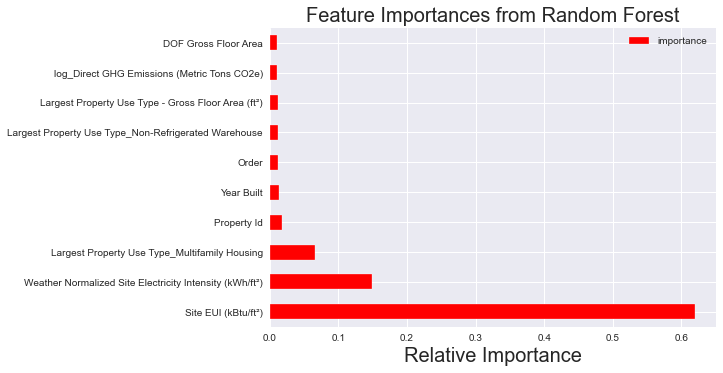

In [89]:
feature_results.loc[:9, :].plot(x = 'feature', y = 'importance', kind = 'barh',
                                color = 'red')

plt.xlabel('Relative Importance', size = 20)
plt.ylabel('')
plt.title('Feature Importances from Random Forest', size = 20)

In [92]:
top_10_features = feature_results['feature'][:10]

indices = [list(train_features.columns).index(x) for x in top_10_features]

X_reduced = X[:, indices]
X_test_reduced = X_test[:, indices]

print('Most important training features shape: ', X_reduced.shape)
print('Most important testing  features shape: ', X_test_reduced.shape)

Most important training features shape:  (6622, 10)
Most important testing  features shape:  (2839, 10)


In [94]:
final_model_reduced = grid_search.best_estimator_
final_model_reduced.fit(X_reduced, y)
model_reduced_pred = final_model_reduced.predict(X_test_reduced)
print(f'Random Forest Classifier reduced model MAE  = {mae(y_test, model_reduced_pred):.4f}')

 Random Forest Classifier reduced model MAE  = 10.2403


Уменьшенная модель имеет производительность хуже, поэтому оставим модель содержащую все признаки

Вывод:

1) Результаты показали, что окончательная модель Random Forest Classifier (после подбора гиперпараметров) способна предсказать оценку Energy Star Score здания c абсолютной средней ошибкой 9.7. 

2) Site EUI (kBtu/ft²) и Weather Normalized Site Electricity Intensity (kWh/ft²) наиболее важные признаки предсказания этой моделью таргетного значения. 